<a href="https://colab.research.google.com/github/sau-coder/NLP/blob/master/Number_Prediction_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

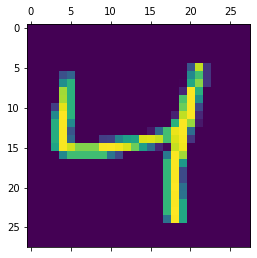

In [ ]:
plt.matshow(x_train[2])

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train_flatten = x_train.reshape(len(x_train) , 28*28)

In [ ]:
x_train_flatten.shape

(60000, 784)

In [ ]:
x_test_flatten = x_test.reshape(len(x_test) , 28*28)

In [ ]:
x_train_flatten[0]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10 ,input_shape = (784,) , activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten , y_train , epochs = 5)

In [ ]:
model.evaluate(x_test_flatten , y_test)

In [ ]:
y_predicted = model.predict(x_test_flatten)

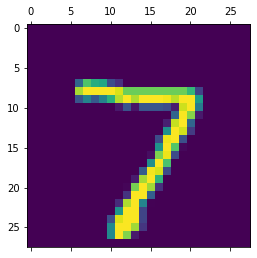

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_predicted[0]

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (784,) , activation = "relu"),
    keras.layers.Dense(50 , activation = "relu"),
    keras.layers.Dense(10 , activation = 'softmax')
])

model_1.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_1.fit(x_train_flatten , y_train , epochs = 5)

In [ ]:
y_predicted_by_softmax = model_1.predict(x_test_flatten)

In [ ]:
y_predicted_by_softmax[0]

In [ ]:
np.argmax(y_predicted_by_softmax[0])

7

In [ ]:
output = [np.argmax(i) for i in y_predicted_by_softmax]

In [ ]:
output

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = output)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    1,    1,    3,    1,    3,    0],
       [   2, 1122,    2,    2,    0,    0,    3,    1,    3,    0],
       [   6,    1, 1003,    5,    2,    0,    3,    7,    5,    0],
       [   0,    0,    3,  992,    0,    1,    0,    6,    4,    4],
       [   4,    0,    1,    0,  960,    0,    7,    1,    1,    8],
       [   3,    0,    0,   23,    0,  841,    9,    2,   10,    4],
       [   4,    2,    2,    1,    3,    2,  943,    0,    1,    0],
       [   1,    1,    5,    2,    0,    0,    0, 1010,    5,    4],
       [   4,    0,    3,    7,    3,    2,    2,    3,  945,    5],
       [   3,    3,    0,    6,   14,    4,    1,    6,    0,  972]],
      dtype=int32)>

Text(69.0, 0.5, 'Actual')

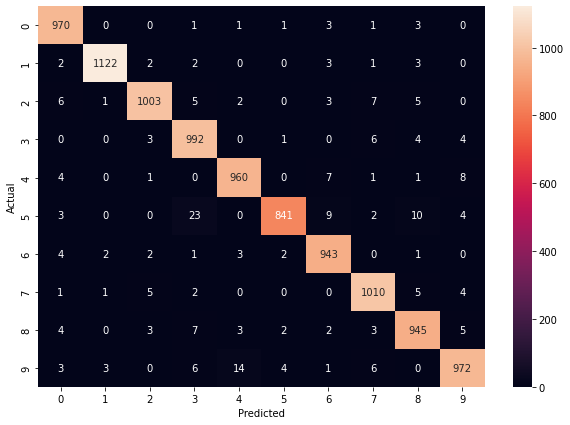

In [ ]:
import seaborn as sns
plt.figure(figsize = (10 , 7))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")